# Logistic Regression: Theory and Implementation

## 1. Introduction

Logistic Regression is a fundamental algorithm for **binary classification**. It models the probability that a given input belongs to a particular category using the sigmoid (logistic) function. Unlike linear regression, it is designed for scenarios where the outcome is discrete (0 or 1).

---

## 2. The Sigmoid (Logistic) Function

The core of logistic regression is the **sigmoid function**:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

It maps any real-valued number to a value between 0 and 1, which can be interpreted as a probability.

---

## 3. Visualizing the Sigmoid Function



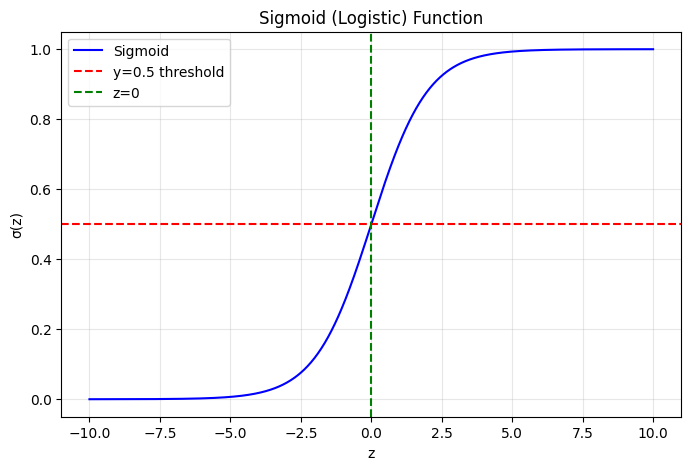

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 1000)
y = sigmoid(z)

plt.figure(figsize=(8,5))
plt.plot(z, y, 'b-', label='Sigmoid')
plt.axhline(y=0.5, color='r', linestyle='--', label='y=0.5 threshold')
plt.axvline(x=0, color='g', linestyle='--', label='z=0')
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.title('Sigmoid (Logistic) Function')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


---

## 4. The Logistic Regression Model

Logistic Regression predicts the probability of class membership:

$$
P(y=1|x) = \sigma(w^T x + b)
$$

- $w$ is the weight vector, $b$ is the bias.
- Class is predicted as 1 if probability $>0.5$, else 0.

---

## 5. Cost Function (Binary Cross-Entropy / Log-Loss)

The loss minimized in logistic regression is **binary cross-entropy**:

$$
J(w, b) = -\frac{1}{N} \sum_{i=1}^{N} [ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) ]
$$

- $y^{(i)}$: true label
- $\hat{y}^{(i)}$: predicted probability

---

## 6. Simple Dataset Creation



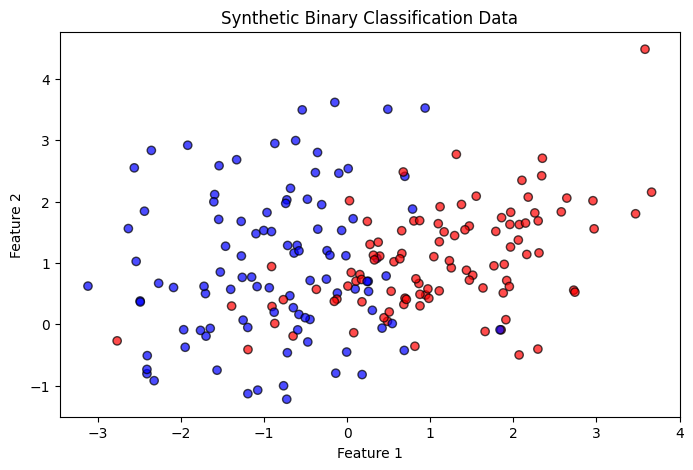

In [22]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)
plt.figure(figsize=(8,5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Binary Classification Data')
plt.show()



---

## 7. Manual Logistic Regression Implementation (NumPy, Gradient Descent)



In [23]:
class LogisticRegressionGD:
    def __init__(self, lr=0.1, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0

        for _ in range(self.n_iters):
            z = np.dot(X, self.w) + self.b
            y_pred = sigmoid(z)
            
            # Gradients
            dw = (1/self.m) * np.dot(X.T, (y_pred - y))
            db = (1/self.m) * np.sum(y_pred - y)
            
            # Parameter update
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_prob(self, X):
        z = np.dot(X, self.w) + self.b
        return sigmoid(z)
    
    def predict(self, X):
        return (self.predict_prob(X) >= 0.5).astype(int)

# Train the model
model = LogisticRegressionGD(lr=0.1, n_iters=1000)
model.fit(X, y)
print("Weights:", model.w)
print("Bias:", model.b)


Weights: [ 1.94358239 -0.45303836]
Bias: 0.2126240806473121



---

## 8. Decision Boundary Visualization



In [24]:
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Compatible with both custom and scikit-learn models
    if hasattr(model, 'predict_prob'):
        probs = model.predict_prob(grid).reshape(xx.shape)
    else:  # sklearn LogisticRegression
        probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

    plt.figure(figsize=(8,5))
    plt.contourf(xx, yy, probs, levels=25, cmap="RdBu", alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.colorbar(label='Predicted probability')
    plt.show()



---

## 9. Model Performance Evaluation



In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X)
print("Accuracy:", accuracy_score(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))


Accuracy: 0.84
Confusion Matrix:
 [[83 17]
 [15 85]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       100
           1       0.83      0.85      0.84       100

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200




---

## 10. Comparison: scikit-learn LogisticRegression



sklearn Accuracy: 0.84


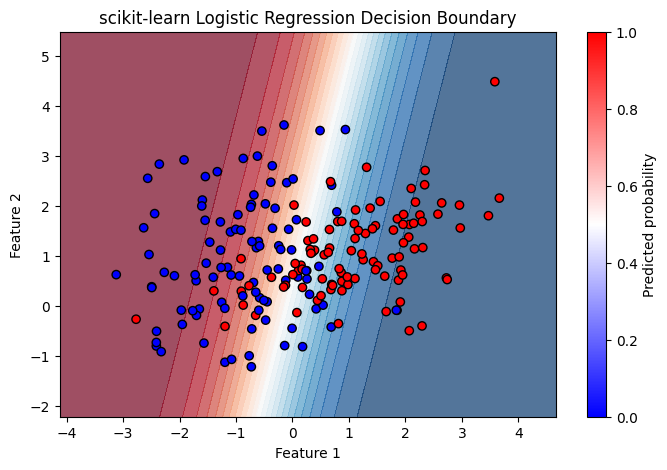

In [26]:
from sklearn.linear_model import LogisticRegression

sk_model = LogisticRegression()
sk_model.fit(X, y)
sk_y_pred = sk_model.predict(X)

print("sklearn Accuracy:", accuracy_score(y, sk_y_pred))
plot_decision_boundary(X, y, sk_model, "scikit-learn Logistic Regression Decision Boundary")



---

## 11. Summary & Further Reading

- Logistic regression is a core binary classification model using the sigmoid function.
- The decision boundary separates classes where $P=0.5$.
- Can be implemented from scratch via gradient descent, or used via high-level libraries like scikit-learn.
- Further topics: regularization, multiclass (softmax), feature engineering.

References:
- ISLR by James et al.
- scikit-learn documentation  
- DeepLearning.ai Machine Learning Specialization
